In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [4]:
# Load the train and test data
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [5]:

# Combine train and test data for preprocessing
combined_data = pd.concat([train_data.drop(columns=['SalePrice']), test_data])

# Identify missing values
missing_values = combined_data.isnull().sum()
missing_columns = missing_values[missing_values > 0].index.tolist()

# Define numerical and categorical features
numerical_features = combined_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = combined_data.select_dtypes(include=['object']).columns.tolist()

In [6]:
# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [7]:
# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

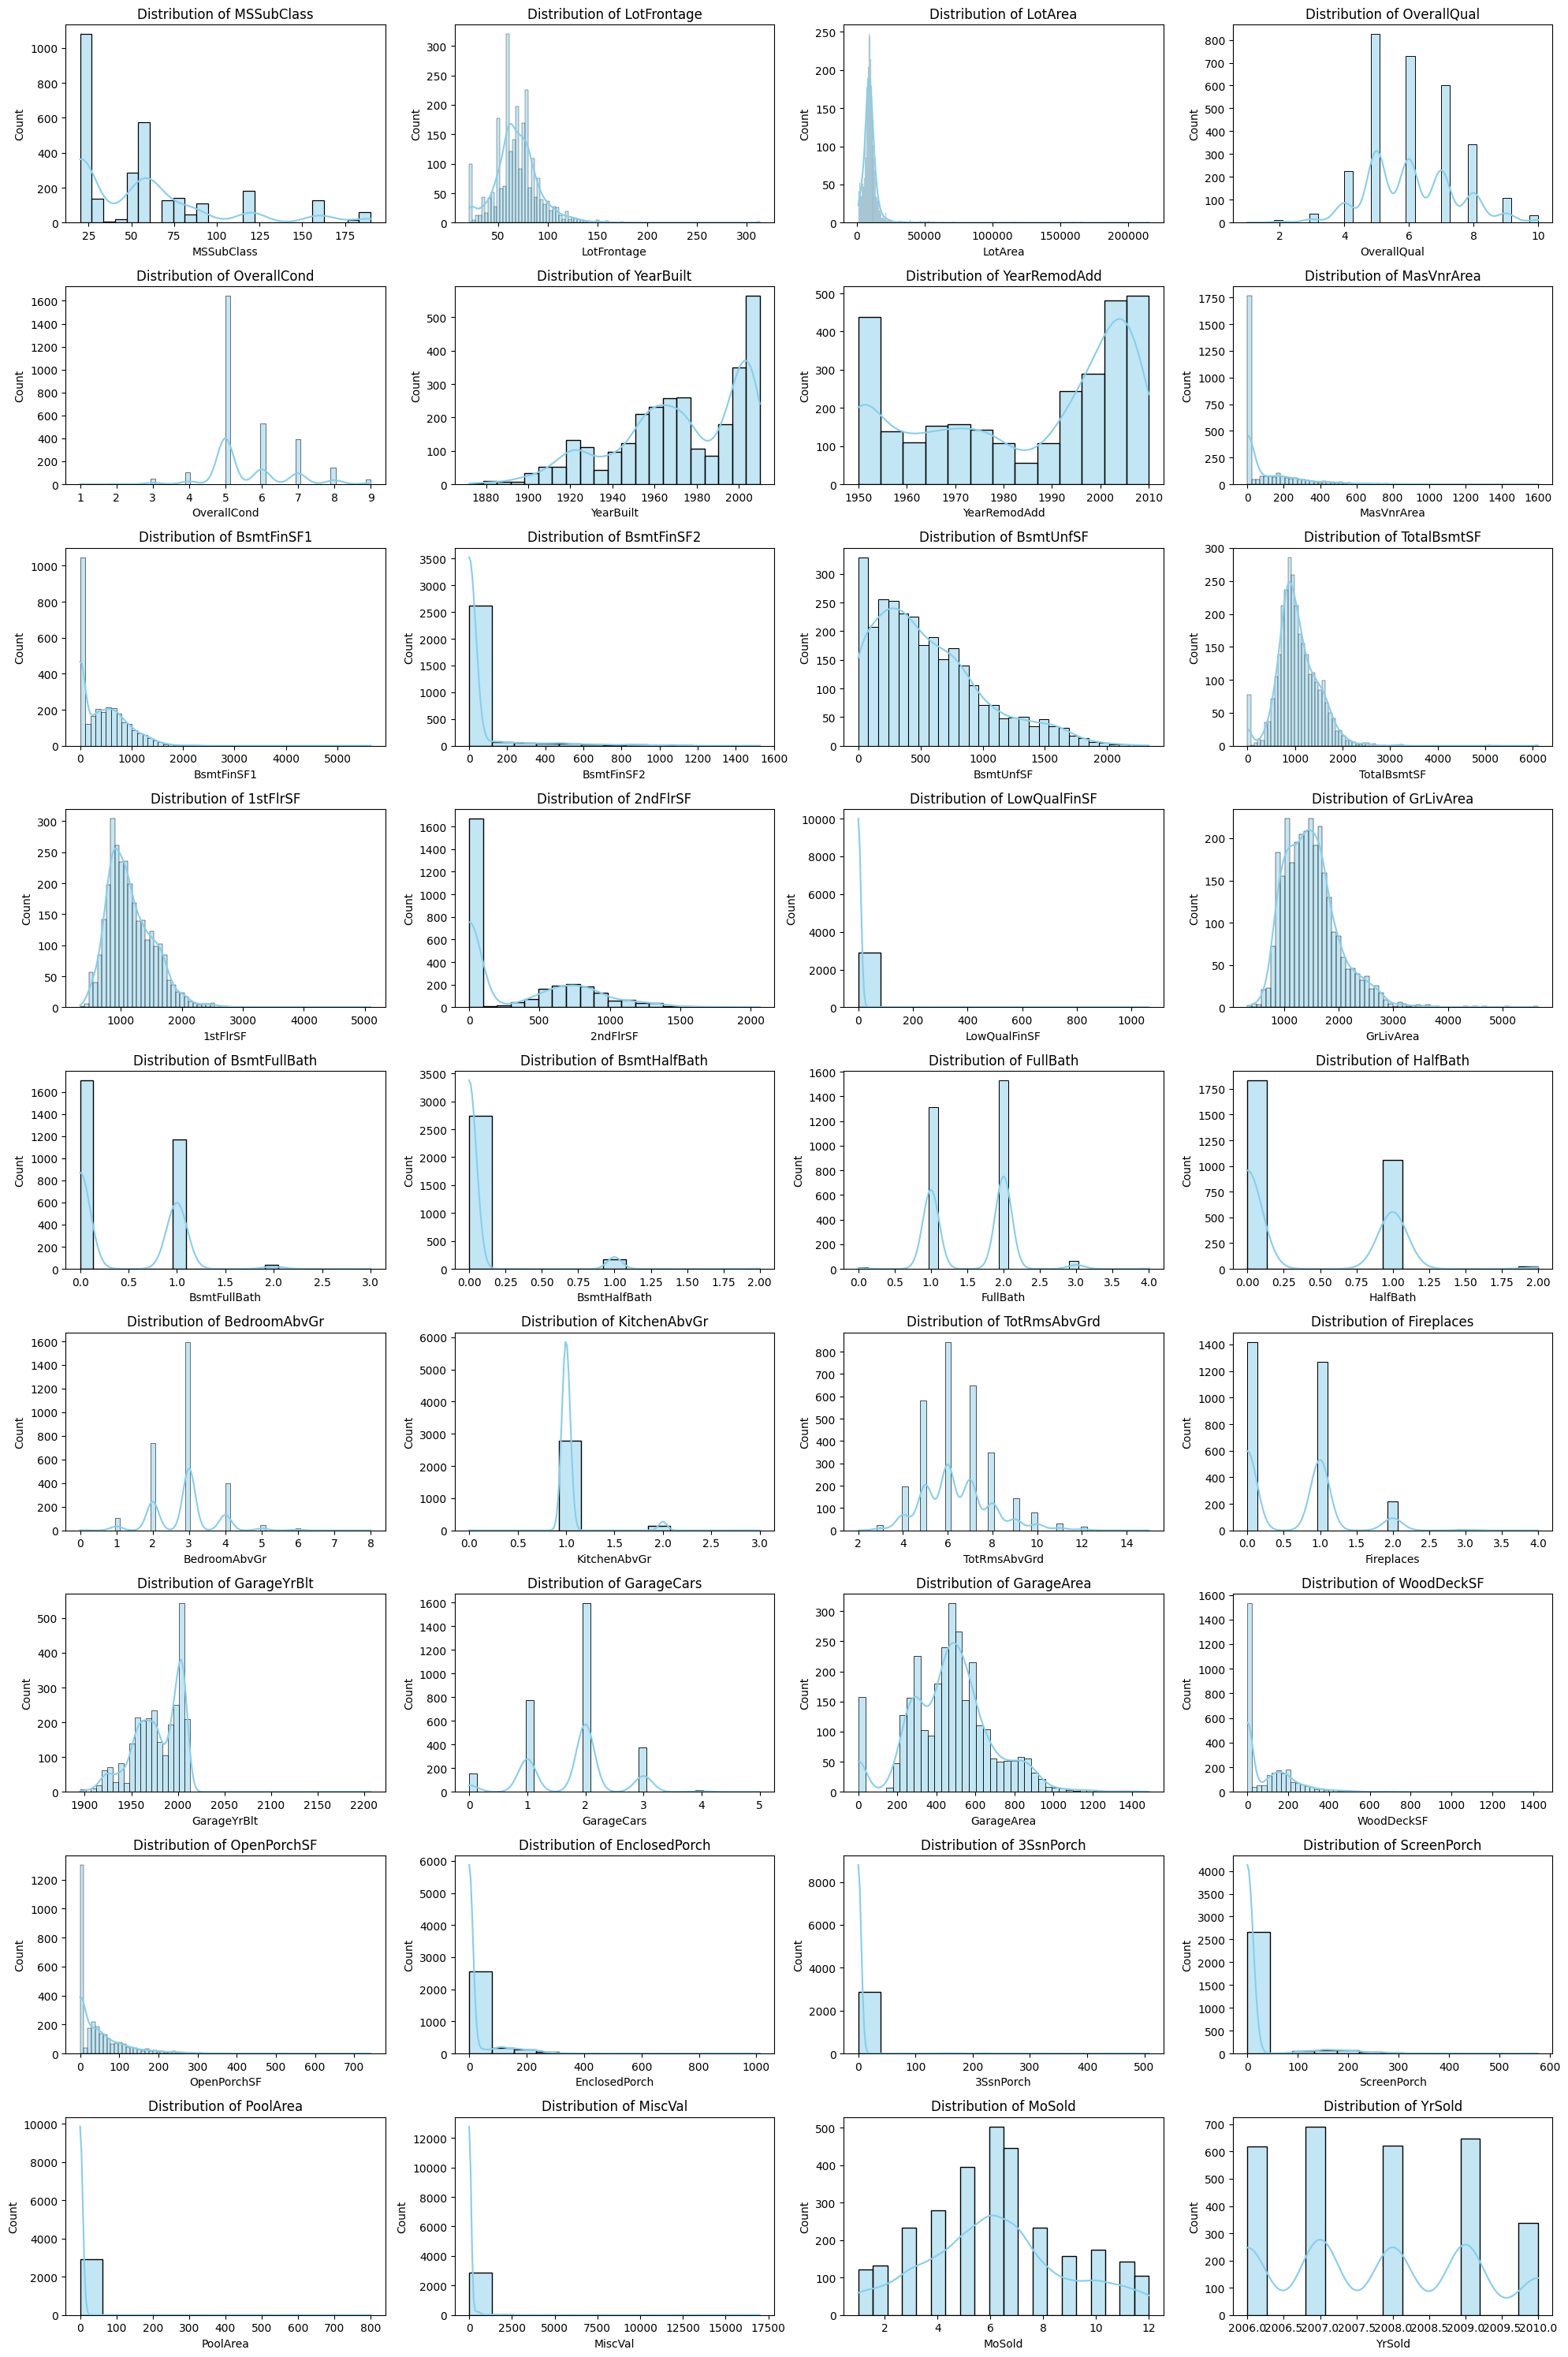

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables
numerical_variables = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
                       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

# Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 30))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over numerical variables and plot histograms
for i, var in enumerate(numerical_variables):
    sns.histplot(combined_data[var].dropna(), kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
combined_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


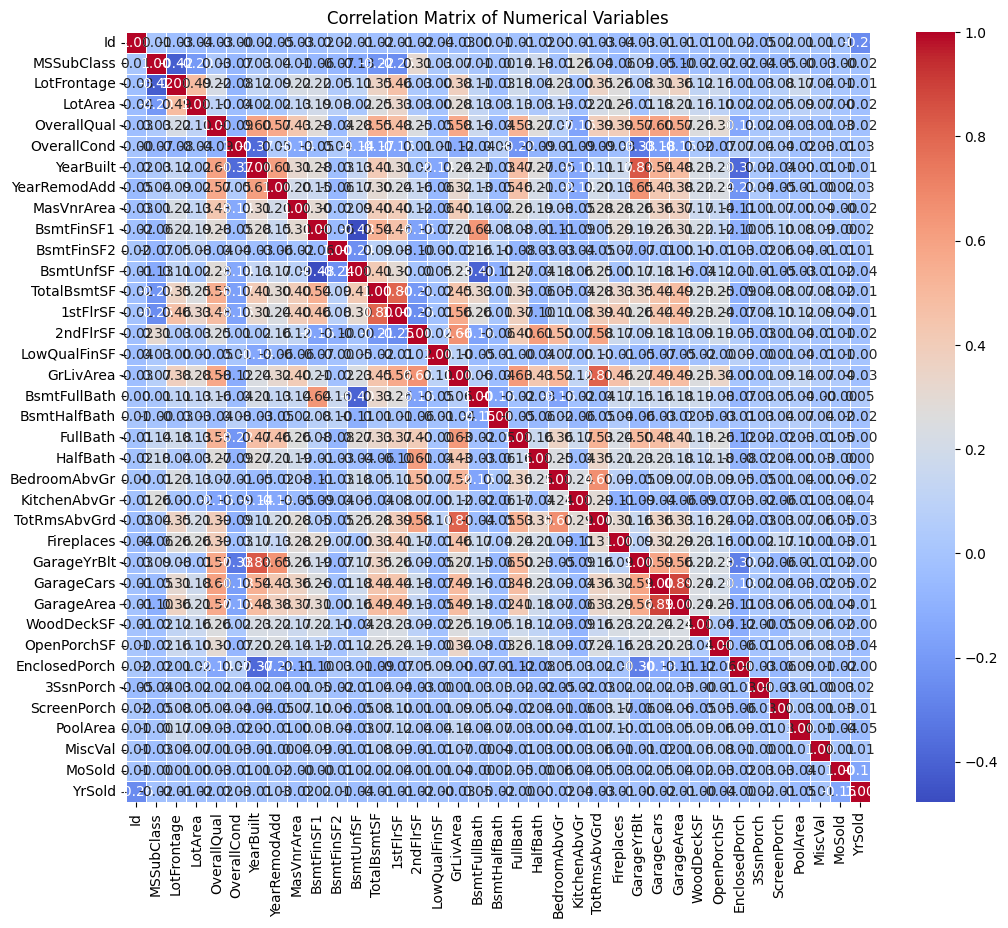

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_data = combined_data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix for numerical columns
numerical_correlation_matrix = numerical_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

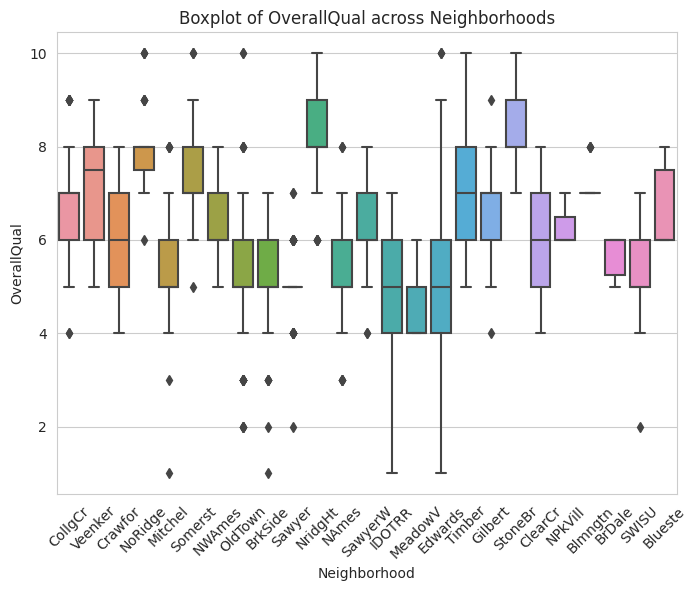

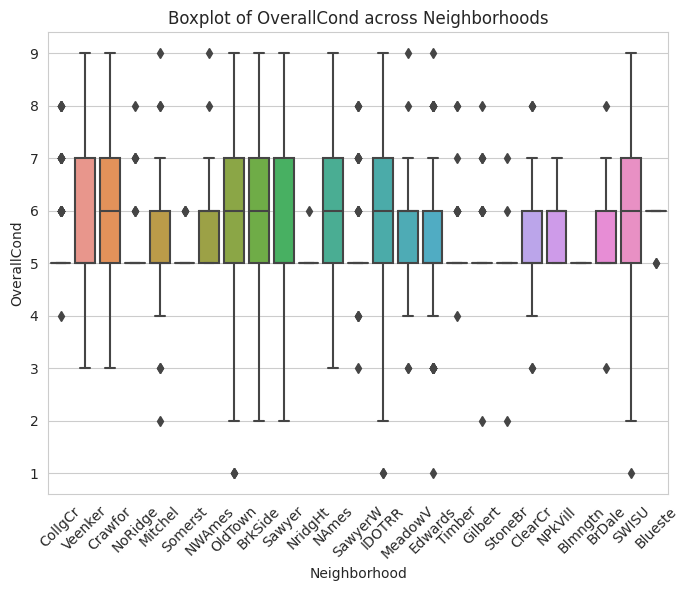

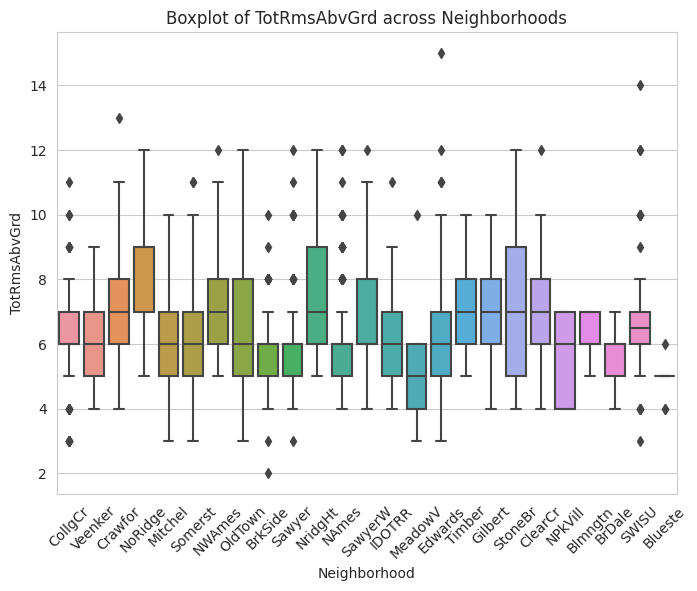

In [11]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Define the variables to plot
numerical_variables = ['OverallQual', 'OverallCond', 'TotRmsAbvGrd']

# Loop through each numerical variable and create a boxplot
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Neighborhood', y=var, data=combined_data)
    plt.title(f'Boxplot of {var} across Neighborhoods')
    plt.xlabel('Neighborhood')
    plt.ylabel(var)
    plt.xticks(rotation=45)  
    plt.show()

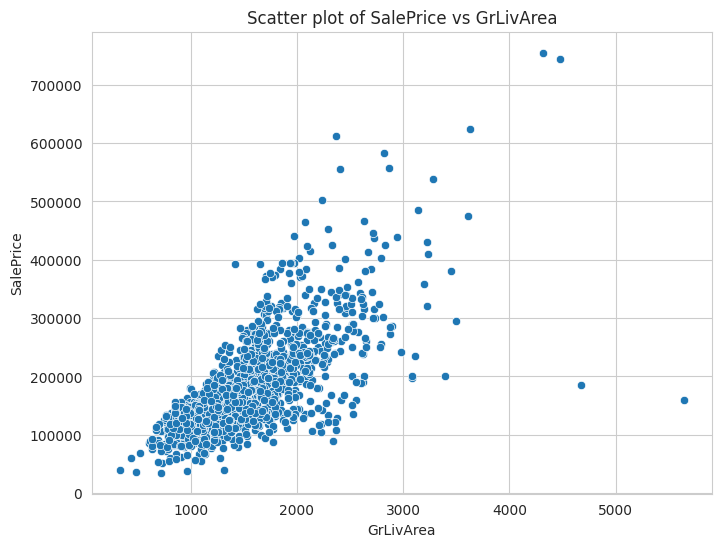

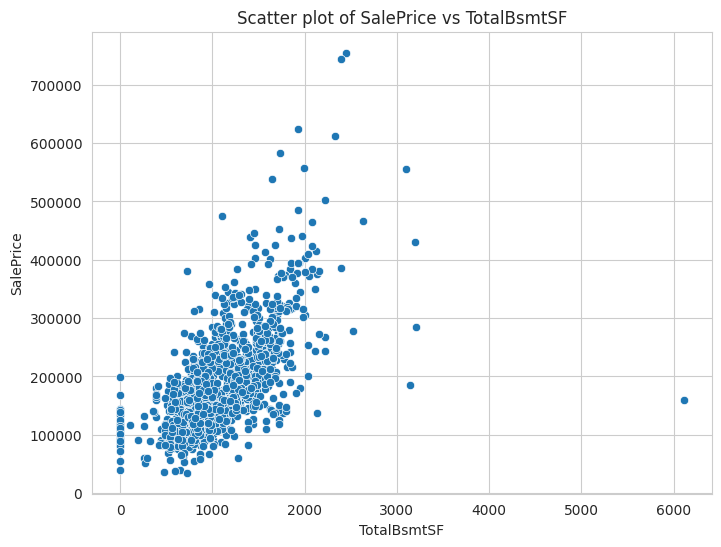

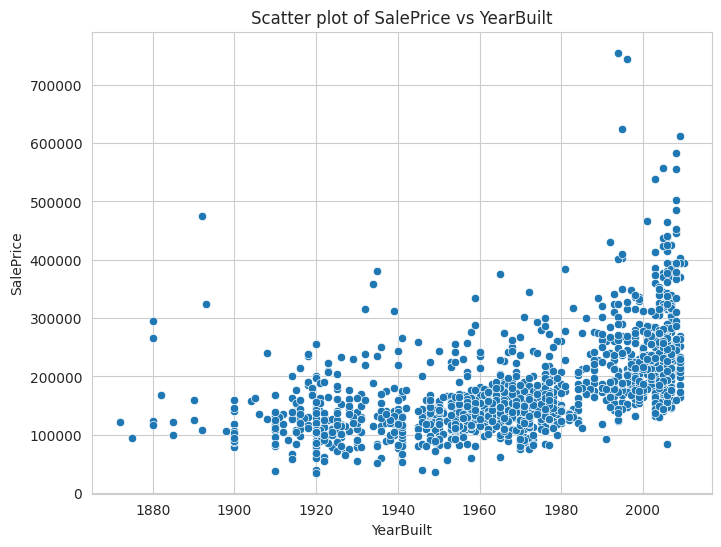

In [12]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Define the variables to plot
scatter_variables = ['GrLivArea', 'TotalBsmtSF', 'YearBuilt']

# Loop through each scatter variable and create a scatter plot
for var in scatter_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var, y='SalePrice', data=train_data)
    plt.title(f'Scatter plot of SalePrice vs {var}')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()

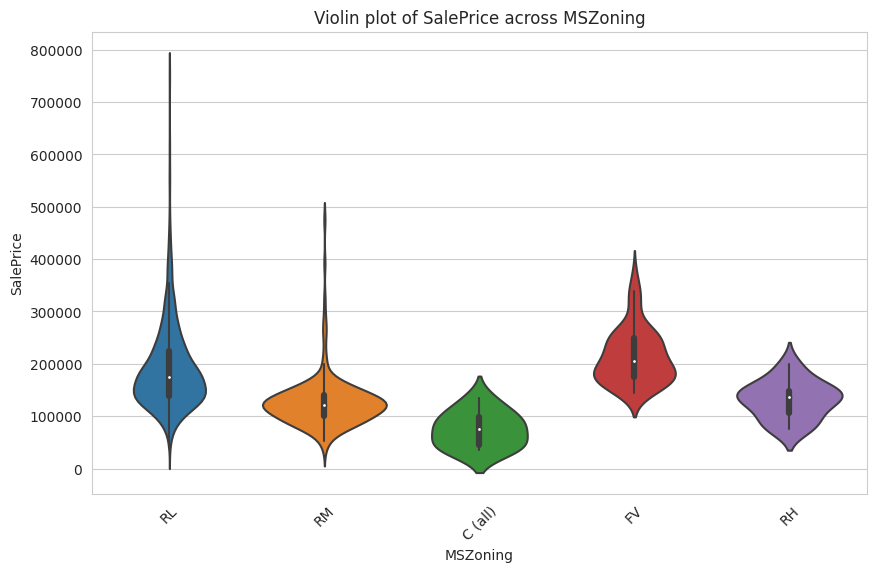

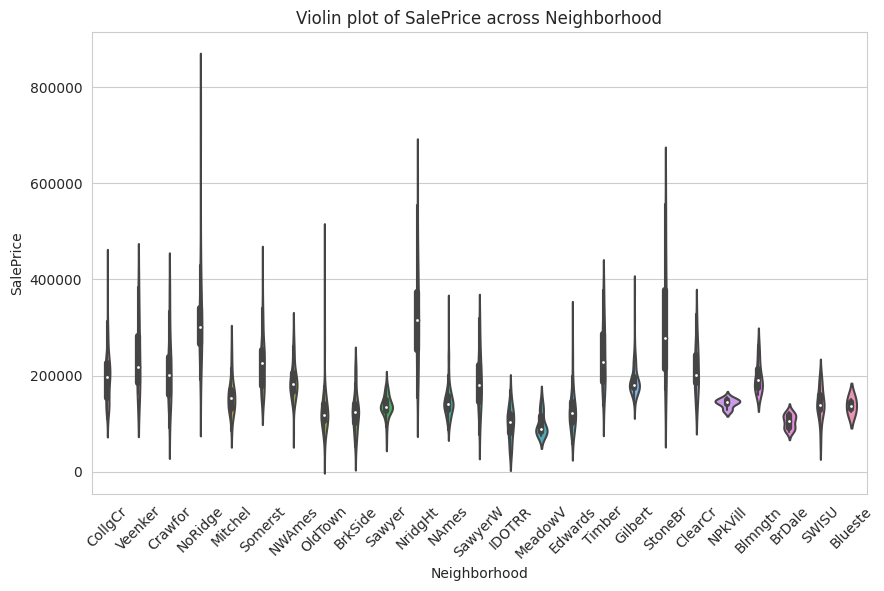

In [13]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Define the variables for violin plots
violin_variables = ['MSZoning', 'Neighborhood']

# Loop through each variable and create a violin plot
for var in violin_variables:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=var, y='SalePrice', data=train_data)
    plt.title(f'Violin plot of SalePrice across {var}')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)  
    plt.show()

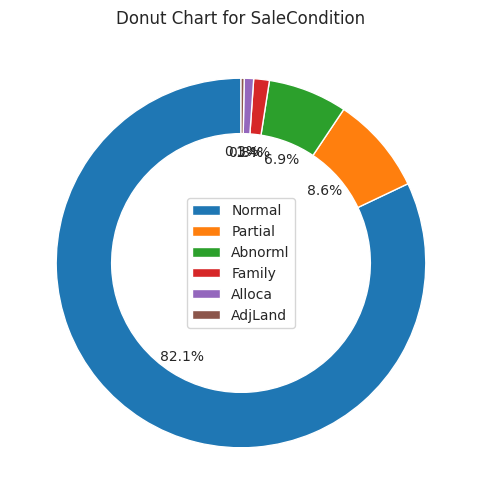

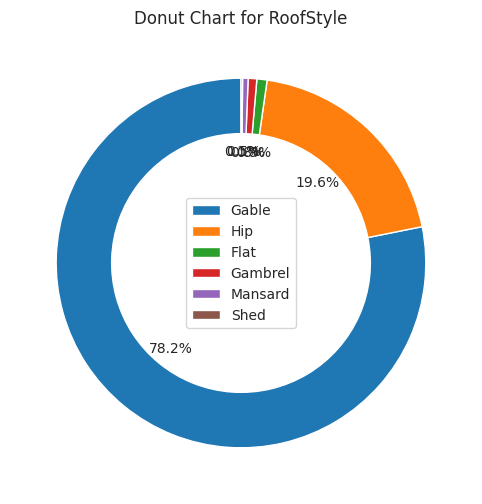

In [14]:
# Define the categorical variables
categorical_variables = ['SaleCondition', 'RoofStyle']

# Loop through each variable and create a donut chart
for var in categorical_variables:
    plt.figure(figsize=(8, 6))
    
    # Get the value counts for the variable
    counts = train_data[var].value_counts()
    
    # Plot the donut chart
    plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
    
    # Add labels with distances from the center
    plt.gca().legend(counts.index, loc='center', labelspacing=0.5, bbox_to_anchor=(0.5, 0.5))
    
    plt.title(f'Donut Chart for {var}')
    plt.show()

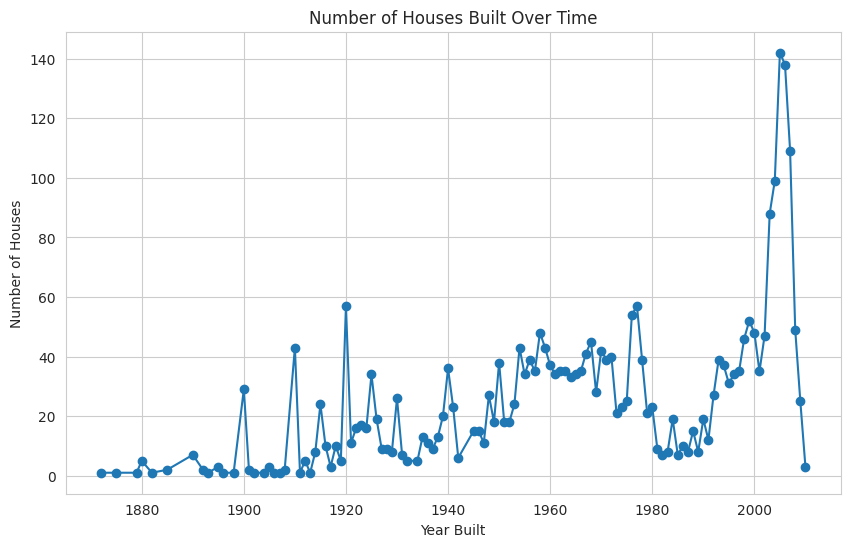

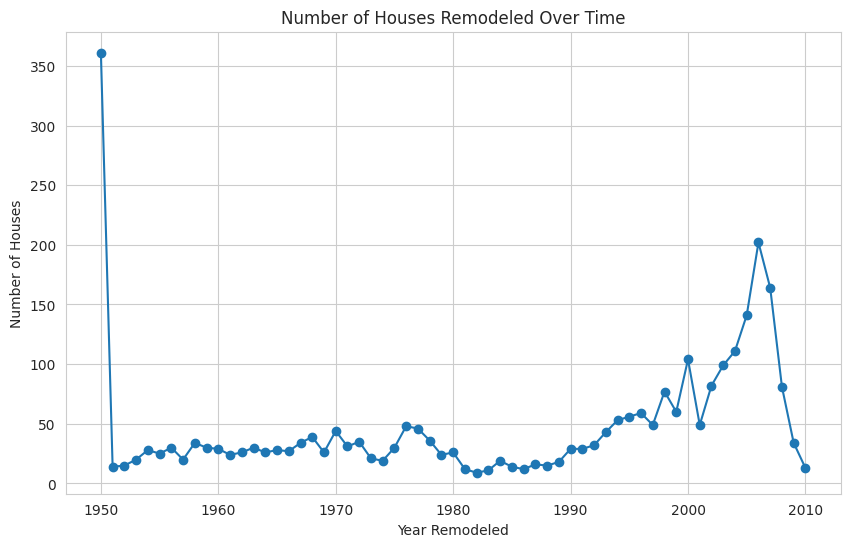

In [15]:
# Plot line chart for YearBuilt
plt.figure(figsize=(10, 6))
plt.plot(combined_data['YearBuilt'].value_counts().sort_index(), marker='o', linestyle='-')
plt.title('Number of Houses Built Over Time')
plt.xlabel('Year Built')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()

# Plot line chart for YearRemodAdd
plt.figure(figsize=(10, 6))
plt.plot(combined_data['YearRemodAdd'].value_counts().sort_index(), marker='o', linestyle='-')
plt.title('Number of Houses Remodeled Over Time')
plt.xlabel('Year Remodeled')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()

In [16]:
# Fit and transform the data
X_processed = preprocessor.fit_transform(combined_data)

In [17]:
# Separate the preprocessed data back into train and test sets
X_train_processed = X_processed[:len(train_data)]
X_test_processed = X_processed[len(train_data):]

In [18]:
# Split the train set into features and target variable
y_train = train_data['SalePrice']

In [19]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_processed, y_train, test_size=0.2, random_state=42)

In [20]:
# Define models
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)


In [21]:
# Fit the models
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [22]:
# Make predictions
random_forest_predictions = random_forest_model.predict(X_test)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)

In [23]:
# Calculate RMSE for the baseline
baseline_prediction = np.mean(y_train)  # You can also use np.median()
baseline_predictions = np.full_like(y_test, fill_value=baseline_prediction)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))

In [24]:
# Calculate RMSE for the models
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_predictions))
gradient_boosting_rmse = np.sqrt(mean_squared_error(y_test, gradient_boosting_predictions))

print("Baseline RMSE:", baseline_rmse)
print("Random Forest RMSE:", random_forest_rmse)
print("Gradient Boosting RMSE:", gradient_boosting_rmse)

Baseline RMSE: 87619.01841524687
Random Forest RMSE: 29040.758246736506
Gradient Boosting RMSE: 26771.31842329448


In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [26]:
# Perform Grid Search CV for Random Forest
rf_grid_search = GridSearchCV(estimator=random_forest_model, param_grid=rf_param_grid, 
                              cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Perform Grid Search CV for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gradient_boosting_model, param_grid=gb_param_grid, 
                              cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [27]:
# Get the best hyperparameters and the best RMSE scores
best_rf_params = rf_grid_search.best_params_
best_rf_rmse = -rf_grid_search.best_score_

best_gb_params = gb_grid_search.best_params_
best_gb_rmse = -gb_grid_search.best_score_

print("Best Random Forest Params:", best_rf_params)
print("Best Random Forest RMSE:", best_rf_rmse)

print("Best Gradient Boosting Params:", best_gb_params)
print("Best Gradient Boosting RMSE:", best_gb_rmse)

Best Random Forest Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest RMSE: 30343.097067992232
Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Gradient Boosting RMSE: 27218.93345773608


In [28]:
# Initialize the models with the best hyperparameters
best_random_forest_model = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)
best_gradient_boosting_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=300, random_state=42)


In [29]:
# Train the models on the training data
best_random_forest_model.fit(X_train, y_train)
best_gradient_boosting_model.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=10,
                          n_estimators=300, random_state=42)

In [30]:
# Make predictions on the test set
random_forest_predictions = best_random_forest_model.predict(X_test)
gradient_boosting_predictions = best_gradient_boosting_model.predict(X_test)


In [31]:
# Evaluate the models' performance using RMSE
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_predictions))
gradient_boosting_rmse = np.sqrt(mean_squared_error(y_test, gradient_boosting_predictions))

print("Random Forest RMSE:", random_forest_rmse)
print("Gradient Boosting RMSE:", gradient_boosting_rmse)

Random Forest RMSE: 29050.699071869512
Gradient Boosting RMSE: 26480.642138009567


In [32]:
from sklearn.model_selection import cross_val_score

# Define the models with the best hyperparameters
best_random_forest_model = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)
best_gradient_boosting_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=300, random_state=42)

# Perform cross-validation for Random Forest
random_forest_cv_scores = cross_val_score(best_random_forest_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
random_forest_avg_rmse = -random_forest_cv_scores.mean()

# Perform cross-validation for Gradient Boosting
gradient_boosting_cv_scores = cross_val_score(best_gradient_boosting_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
gradient_boosting_avg_rmse = -gradient_boosting_cv_scores.mean()

# Display the average RMSE scores
print("Random Forest Cross-Validation RMSE:", random_forest_avg_rmse)
print("Gradient Boosting Cross-Validation RMSE:", gradient_boosting_avg_rmse)


Random Forest Cross-Validation RMSE: 30343.097067992232
Gradient Boosting Cross-Validation RMSE: 27218.93345773608


In [33]:
# Train the models on the training data
best_random_forest_model.fit(X_train, y_train)
best_gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test set
random_forest_test_predictions = best_random_forest_model.predict(X_test_processed)
gradient_boosting_test_predictions = best_gradient_boosting_model.predict(X_test_processed)

# Create DataFrames for the predictions
random_forest_submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': random_forest_test_predictions})
gradient_boosting_submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': gradient_boosting_test_predictions})

# Save the DataFrames to CSV files
random_forest_submission.to_csv('random_forest_submission.csv', index=False)
gradient_boosting_submission.to_csv('gradient_boosting_submission.csv', index=False)


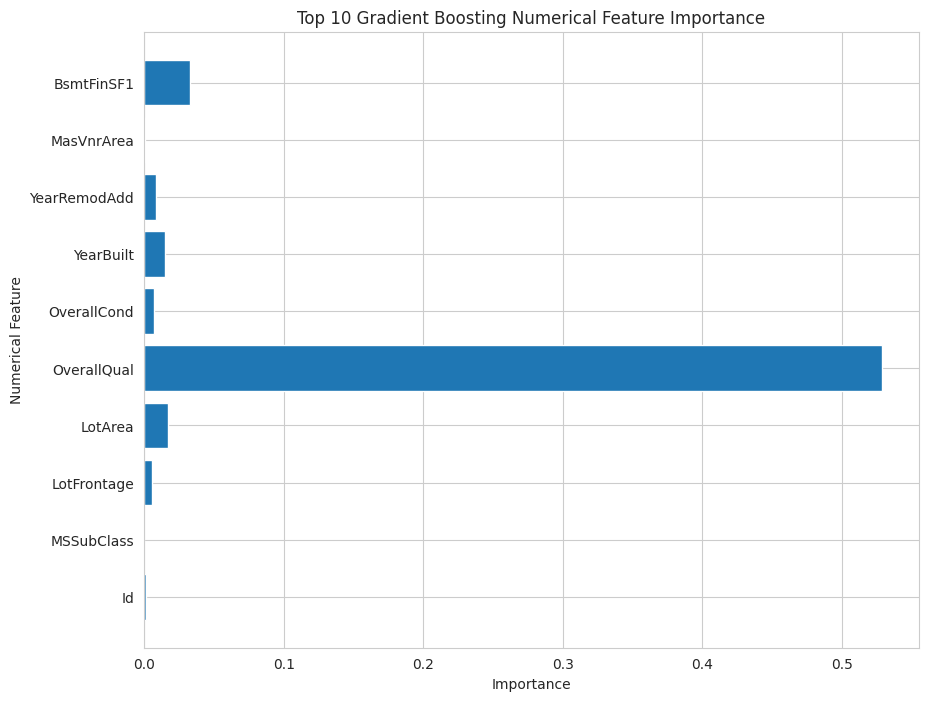

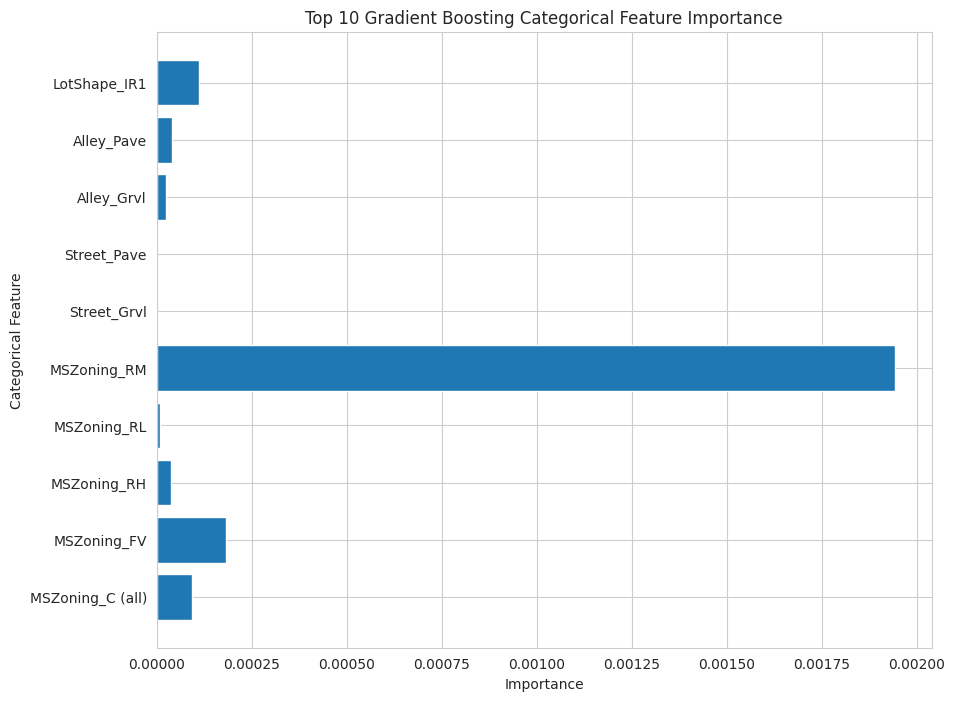

In [36]:
# Get the feature importances for Gradient Boosting
feature_importances_gb = best_gradient_boosting_model.feature_importances_

# Get the numerical feature importances
numerical_feature_importances_gb = feature_importances_gb[:len(numerical_features)]

# Get the categorical feature importances
categorical_feature_importances_gb = feature_importances_gb[len(numerical_features):]

# Plot numerical feature importances
plt.figure(figsize=(10, 8))
plt.barh(numerical_features[:10], numerical_feature_importances_gb[:10])
plt.xlabel('Importance')
plt.ylabel('Numerical Feature')
plt.title('Top 10 Gradient Boosting Numerical Feature Importance')
plt.show()

# Plot categorical feature importances
plt.figure(figsize=(10, 8))
plt.barh(categorical_feature_names[:10], categorical_feature_importances_gb[:10])
plt.xlabel('Importance')
plt.ylabel('Categorical Feature')
plt.title('Top 10 Gradient Boosting Categorical Feature Importance')
plt.show()
